# PTJPL for point forcing datasets
***************************************************************
<left> The below code is from [Fisher et al., 2008](http://josh.yosh.org/publications/Fisher%20et%20al%202008%20-%20Global%20estimates%20of%20the%20land-atmosphere%20water%20flux.pdf)
<left> Adjustments are made for application at daily timesteps
<left> This version of code was authored by: AJ Purdy
<left> Major Contributions for this code are from Gregory Halverson & Grayson Badgley
<left> Contact:  ajpurdy@uci.edu     
***************************************************************

    Input variables within DATAFRAME:     
        air_temperature: air temperature near the surface (C)
        air_temperature_mean: daily average air temperature near the surface (K)        
        RH_day_min: minimum daily relative humidity(%) 
           replacement if not avail --> daily minimum vapor pressure (Pa)
        ndvi_mean: average Normalized Difference Vegetation Index for day        
        optimum_temperature: phenologically optimum temperature (K)
        fAPARmax: maximum fraction of photosynthetically active radiation (unitless)   
        net_radiation: instantaneous net radiation in (W/m2) 
        daily_radiation: daily net radiation in (W/m2)
        
    Returned:
        A dataset is returned from this script containing the following variables:
        evapotranspiration: total evapotranspiration (W/m2)
        interception_evaporation: intercepted evaporation (W/m2) 
        soil_evaporation: evaporation from soil (W/m2)
        canopy_transpiration: transpiration from canopy (W/m2)                       
        potential_evapotranspiration: potential evapotranspiration (W/m2)
        
***************************************************************


In [1]:
import datetime
import glob
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import exp, log
import os
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
# FILE PATHWAYS
data_path = r'C:\GitWork\H8AHI_ET\test\data'

In [3]:
# ----------------------- MODEL IS IN THE LIBRARY REFERENCED HERE ---------------------- 
from ptjpl_lib import *
# ----------------------------- NOTEBOOK SPECIFIC COMMANDS ----------------------------- 
# % matplotlib inline
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))

datMMS = pd.read_csv(data_path + '/inputs_test.csv')
df_MMS = datMMS.set_index('Time')

In [4]:
type(df_MMS)

pandas.core.frame.DataFrame

In [5]:
df_MMS

,TA,TA_day_mean,NDVI,NETRAD,NETRAD_day,RH_day_min,TA_day_max
Time,,,,,,,
2013/1/1,-2.193,-1.378458,0.431233,49.103,15.763083,0.77118,1.300
2013/1/2,-7.895,-6.390042,0.428206,195.077,21.789375,0.46072,-3.110
2013/1/3,-5.470,-4.093125,0.425179,231.166,30.559167,0.50948,0.080
2013/1/4,-3.203,-2.224292,0.422152,228.543,37.076125,0.56178,-0.275
2013/1/5,-2.135,-0.573583,0.419125,192.995,19.035250,0.51977,3.535
...,...,...,...,...,...,...,...
2013/11/14,4.745,4.755542,0.396669,313.699,43.927750,0.19509,11.674
2013/11/15,6.332,7.689000,0.392112,73.031,8.279125,0.31852,11.159
2013/11/16,9.894,11.441750,0.387556,70.854,39.342583,0.75011,15.449


In [6]:
df_model_MMS = ptjpl(df_MMS)

calculating surface wetness values [%]
calculating vapor pressure deficit [kPa]
calculating vegetation values
calculating plant optimum temperature
27.1351 C
calculating soil evaporation
calculating canopy transpiration
calculating interception evaporation
combining evapotranspiration
calculating daily evapotranspiration
calculating potential evapotranspiration


In [7]:
df_model_MMS

,TA,TA_day_mean,NDVI,NETRAD,NETRAD_day,RH_day_min,TA_day_max,RH_roll,fAPAR,fIPAR,VPD_roll,soil_moisture_constraint,savi,VPD,evapotranspiration,potential_evapotranspiration,canopy_transpiration,interception_evaporation,soil_evaporation
Time,,,,,,,,,,,,,,,,,,,
2013/1/1,-2.193,-1.378458,0.431233,49.103,15.763083,0.77118,1.300,0.77118,0.396478,0.381233,0.228820,0.000000,0.326055,0.228820,1.948055,18.405186,1.948055,0.000000,0.000000
2013/1/2,-7.895,-6.390042,0.428206,195.077,21.789375,0.46072,-3.110,0.46072,0.394621,0.378206,0.539280,0.000000,0.324693,0.539280,0.881066,56.437881,0.881066,0.000000,0.000000
2013/1/3,-5.470,-4.093125,0.425179,231.166,30.559167,0.50948,0.080,0.50948,0.392764,0.375179,0.490520,0.000000,0.323331,0.490520,6.233032,74.929423,6.233032,0.000000,0.000000
2013/1/4,-3.203,-2.224292,0.422152,228.543,37.076125,0.56178,-0.275,0.56178,0.390907,0.372152,0.438220,0.000000,0.321968,0.438220,7.839245,81.761223,7.839245,0.000000,0.000000
2013/1/5,-2.135,-0.573583,0.419125,192.995,19.035250,0.51977,3.535,0.51977,0.389050,0.369125,0.480230,0.000000,0.320606,0.480230,7.764099,72.094948,7.764099,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013/11/14,4.745,4.755542,0.396669,313.699,43.927750,0.19509,11.674,0.19509,0.375275,0.346669,0.804910,0.582547,0.310501,0.804910,64.130053,149.053599,21.109306,0.109321,42.911425
2013/11/15,6.332,7.689000,0.392112,73.031,8.279125,0.31852,11.159,0.31852,0.372480,0.342112,0.722679,0.572669,0.308451,0.722679,16.580283,36.379570,5.918405,0.187631,10.474248
2013/11/16,9.894,11.441750,0.387556,70.854,39.342583,0.75011,15.449,0.75011,0.369685,0.337556,0.340834,0.594797,0.306400,0.340834,25.436014,38.934601,5.129841,6.111363,14.194810


Text(0.5, 1.0, 'Morgan Monroe State Forest')

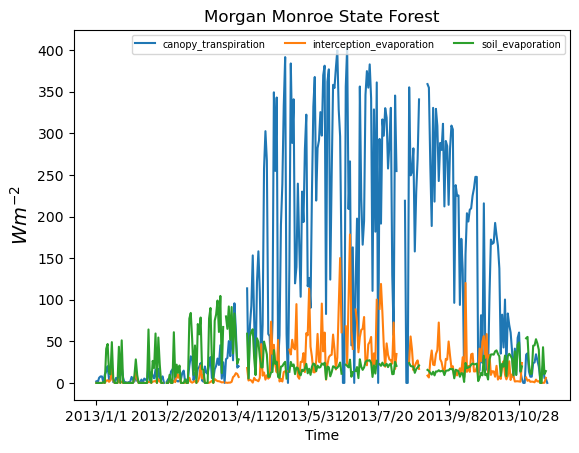

In [8]:
plt.figure()
df_model_MMS.canopy_transpiration.plot()
df_model_MMS.interception_evaporation.plot()
df_model_MMS.soil_evaporation.plot()
plt.legend(ncol=3, fontsize=7)
plt.ylabel('$Wm^{-2}$', fontsize=14)
plt.title('Morgan Monroe State Forest')

In [9]:
obsMMS = pd.read_csv(data_path + '/obs_test.csv')
obs_MMS = obsMMS.set_index('Time')

Text(0, 0.5, '$Wm^{-2}$')

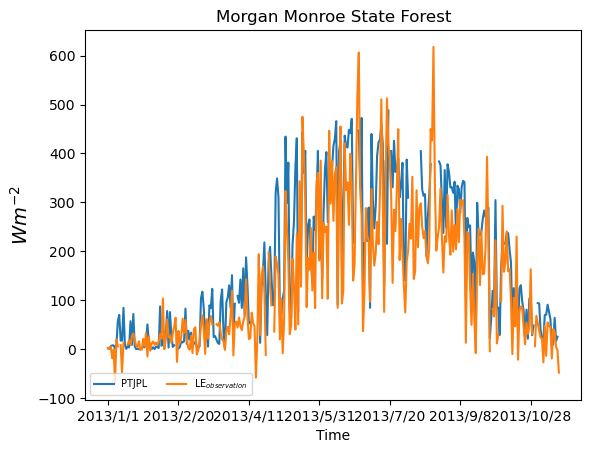

In [10]:
plt.figure()
df_model_MMS.evapotranspiration.plot(label='PTJPL')
obs_MMS.LE_FC.plot(label='LE$_{observation}$')
plt.legend(ncol=2, loc = 3, fontsize = 7)
plt.title('Morgan Monroe State Forest')
plt.ylabel('$Wm^{-2}$', fontsize=14)

Text(0, 0.5, '$Wm^{-2}$')

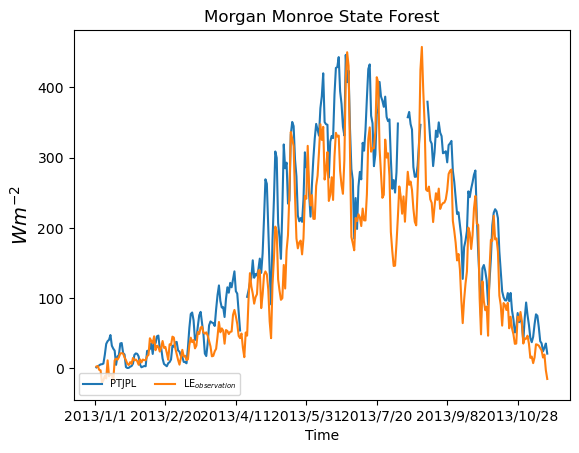

In [11]:
plt.figure()
df_model_MMS.evapotranspiration.rolling(4,2).mean().plot(label='PTJPL') # window rolling
obs_MMS.LE_FC.rolling(4,2).mean().plot(label='LE$_{observation}$')
plt.legend(ncol=2, loc = 3, fontsize = 7)
plt.title('Morgan Monroe State Forest')
plt.ylabel('$Wm^{-2}$', fontsize=14)